In [1]:
import sys
sys.path.append('../src')

from module.module import Linear
from module.activation import TanH, Softmax

from loss.loss import CrossEntropie, CELogSoftmax
from networks.optim import Optim
from networks.sequentiel import Sequentiel

from utils.generation import generate_linear_data, generate_data_gauss
from utils.plots import plot_net
from utils.processing import one_hot_y

import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

In [2]:
data = pkl.load(open("../data/usps.pkl",'rb')) 

In [3]:
X = data["X_train"]
y = data["Y_train"]

X_test = data["X_test"]
y_test = data["Y_test"]

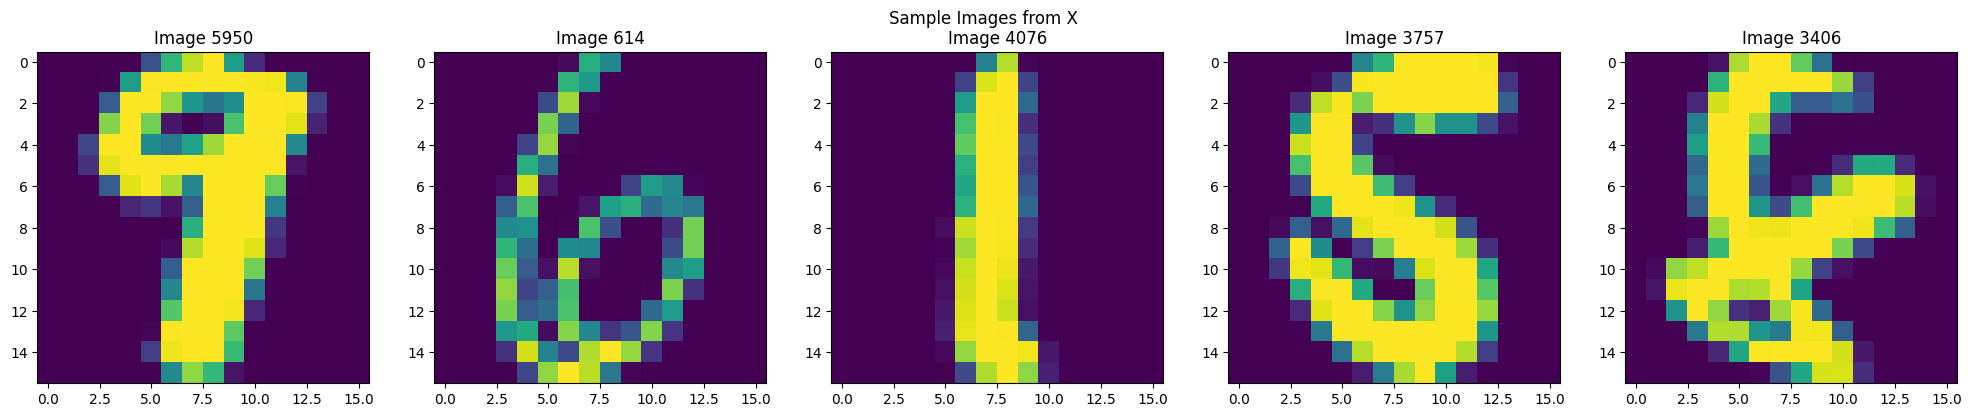

In [4]:
n = 5
fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(20, 4))

for ax in axes.flatten():
    i = np.random.randint(len(X))
    ax.imshow(X[i].reshape(16, 16))
    ax.set_title(f"Image {i+1}")

fig.suptitle("Sample Images from X")
plt.tight_layout()
plt.show()

In [4]:
classes = len(np.unique(y))

input_neurons = X.shape[1]
output_neurons = classes

In [5]:
y_one_hot = one_hot_y(y, classes)

100%|██████████| 50/50 [00:09<00:00,  5.41it/s]


Training completed.


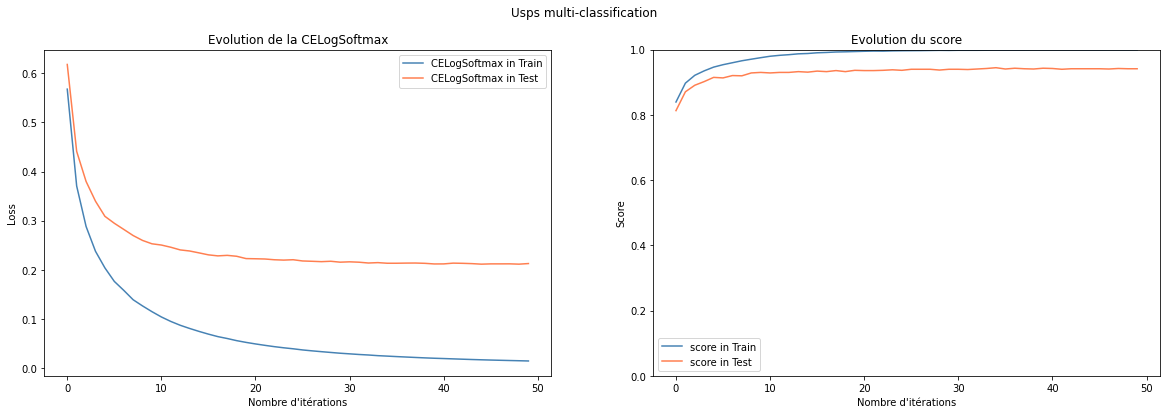

In [7]:
hidden_neurons_1 = 100
hidden_neurons_2 = 80

net = Sequentiel([
    Linear(input_neurons, hidden_neurons_1, bias=True),
    TanH(),
    Linear(hidden_neurons_1, hidden_neurons_2, bias=True),
    TanH(),
    Linear(hidden_neurons_2, output_neurons, bias=True),
], classes_type="multi")

optim = Optim(net, CELogSoftmax(), eps=1e-3)
optim.SGD(X, y_one_hot, test_train_split=True, batch_size=50, epochs=50, verbose=False)

plot_net(optim, X, y_one_hot, net_type="multiclass", net_title="Usps multi-classification")